<div style="font-family: Arial, sans-serif; line-height: 1.6;">

<!-- Section 1: Aim -->
<div style="border-left: 6px solid #007BFF; background-color: #e7f3ff; padding: 20px 25px; margin: 25px 0; border-radius: 8px; box-shadow: 0 2px 5px rgba(0,0,0,0.1);">
  <h2 style="margin-top: 0; margin-bottom: 15px; color: #0056b3; border-bottom: 2px solid #0056b3; padding-bottom: 8px;">🎯 1. Aim</h2>
  <p style="margin: 0; color: #333;">
    The primary aim of this study is to leverage machine learning techniques to accurately classify biological samples as either Colorectal Cancer (CRC) or Normal Control (NC) based on their metabolomic profiles. A secondary aim is to identify key metabolites that are most influential in this classification, potentially serving as biomarkers, and to compare these findings with traditional statistical approaches.
  </p>
</div>

<!-- Section 2: Objectives -->
<div style="border-left: 6px solid #FF9800; background-color: #fff3e0; padding: 20px 25px; margin: 25px 0; border-radius: 8px; box-shadow: 0 2px 5px rgba(0,0,0,0.1);">
  <h2 style="margin-top: 0; margin-bottom: 15px; color: #c66900; border-bottom: 2px solid #c66900; padding-bottom: 8px;">🎯 2. Objectives</h2>
  <p style="margin-bottom: 10px; color: #333;">To achieve the stated aim, the following objectives have been set:</p>
  <ol style="margin: 0; padding-left: 20px; color: #333;">
    <li style="margin-bottom: 8px;">
      <strong>Data Preprocessing:</strong> To effectively load, clean, transform (e.g., Log2 transformation), and scale (e.g., Z-score standardization) the raw metabolomics data using Apache Spark to prepare a robust dataset for machine learning.
    </li>
    <li style="margin-bottom: 8px;">
      <strong>Predictive Modeling:</strong>
      <ul style="margin-top: 5px; padding-left: 20px; list-style-type: disc;">
        <li style="margin-bottom: 4px;">To develop and evaluate multiple machine learning models, including an Artificial Neural Network (ANN), an FT-Transformer, and an XGBoost classifier, for the task of CRC vs. NC classification.</li>
        <li style="margin-bottom: 4px;">To compare model performance using standard classification metrics (Accuracy, Precision, Recall, F1 Score, ROC-AUC) on an unseen test dataset.</li>
      </ul>
    </li>
    <li style="margin-bottom: 8px;">
      <strong>Model Interpretation:</strong> To interpret the best-performing predictive model using SHAP (SHapley Additive exPlanations) to identify the most important metabolomic features contributing to the classification.
    </li>
    <li style="margin-bottom: 8px;">
      <strong>Comparative Analysis:</strong> To compare the set of biomarkers identified through the machine learning approach with those identified using the statistical filtering criteria (VIP score, Log₂ Fold Change, p-value) from the reference study.
    </li>
    <li style="margin-bottom: 8px;">
      <strong>Reproducibility:</strong> To ensure the analytical workflow is reproducible by setting appropriate random seeds and clearly documenting all steps.
    </li>
  </ol>
</div>

<!-- Section 3: Research Questions -->
<div style="border-left: 6px solid #9C27B0; background-color: #f3e5f5; padding: 20px 25px; margin: 25px 0; border-radius: 8px; box-shadow: 0 2px 5px rgba(0,0,0,0.1);">
  <h2 style="margin-top: 0; margin-bottom: 15px; color: #6a0080; border-bottom: 2px solid #6a0080; padding-bottom: 8px;">❓ 3. Research Questions</h2>
  <p style="margin-bottom: 10px; color: #333;">This study seeks to answer the following key research questions:</p>
  <ol style="margin: 0; padding-left: 20px; color: #333;">
    <li style="margin-bottom: 8px;">Can machine learning models effectively differentiate between CRC and NC samples based on their metabolomic profiles?</li>
    <li style="margin-bottom: 8px;">Which machine learning algorithm (ANN, FT-Transformer, XGBoost) provides the best predictive performance for this classification task, considering metrics like Recall, F1-score, and ROC-AUC?</li>
    <li style="margin-bottom: 8px;">What are the most influential metabolites (potential biomarkers) identified by the best-performing machine learning model?</li>
    <li style="margin-bottom: 8px;">How do the biomarkers identified through a data-driven machine learning approach compare with those identified using traditional statistical filtering methods (VIP scores, fold change, p-values)?</li>
    <li style="margin-bottom: 8px;">What is the extent of overlap or divergence between the feature sets identified by these different analytical strategies?</li>
  </ol>
</div>

<!-- Section 4: Methodology -->
<div style="border-left: 6px solid #4CAF50; background-color: #e8f5e9; padding: 20px 25px; margin: 25px 0; border-radius: 8px; box-shadow: 0 2px 5px rgba(0,0,0,0.1);">
  <h2 style="margin-top: 0; margin-bottom: 15px; color: #2e7d32; border-bottom: 2px solid #2e7d32; padding-bottom: 8px;">📋 4. Methodology</h2>
  <p style="margin-bottom: 16px; color: #333;">
    The analytical pipeline for this study is structured into several major stages, detailed below. Each stage corresponds to distinct sections within this notebook.
  </p>
  <ol style="margin: 0; padding-left: 20px; color: #333; list-style-type: decimal;">
    <li style="margin-bottom: 12px;">
      <strong>Data Acquisition and Initial Setup</strong>
      <ul style="margin: 6px 0 0 20px; padding: 0; list-style-type: disc;">
        <li style="margin-bottom: 4px;">Import necessary Python libraries (pandas, NumPy, PySpark, PyTorch, XGBoost, scikit-learn, SHAP, Matplotlib, Seaborn).</li>
        <li style="margin-bottom: 4px;">Set random seeds (e.g., 42) for Python, NumPy, and PyTorch to ensure reproducibility.</li>
        <li style="margin-bottom: 4px;">Initialize an Apache Spark session (16GB driver memory, 8GB max result size).</li>
        <li style="margin-bottom: 4px;">Load primary datasets:
            <ul style="margin-top: 4px; padding-left: 20px; list-style-type: circle;">
                <li><code>ALL_sample_data.csv</code>: Metabolomic intensity data and annotations.</li>
                <li><code>sample_info.csv</code>: Sample group information (CRC/NC).</li>
                <li><code>NC_vs_CRC_filter.xlsx</code>: Pre-calculated statistical values (VIP, Log₂FC, p-value) from the reference study.</li>
            </ul>
        </li>
      </ul>
    </li>
    <li style="margin-bottom: 12px;">
      <strong>Data Preprocessing and Preparation (Spark & Python)</strong>
      <ul style="margin: 6px 0 0 20px; padding: 0; list-style-type: disc;">
        <li style="margin-bottom: 4px;">Inspect schemas of loaded Spark DataFrames.</li>
        <li style="margin-bottom: 4px;">Prepare target variable (`Group`) and `Sample_ID` from sample metadata.</li>
        <li style="margin-bottom: 4px;">Reshape feature data (melt and pivot) in Spark to obtain `X_model_spark` (samples as rows, 927 metabolites as columns).</li>
        <li style="margin-bottom: 4px;">Align feature and target DataFrames on `Sample_ID` (resulting in 70 samples: 36 CRC, 34 NC).</li>
        <li style="margin-bottom: 4px;">Apply Log2 transformation (`log2(x + 1e-6)`) to metabolite intensities.</li>
        <li style="margin-bottom: 4px;">Standardize log-transformed features (zero mean, unit variance) using Spark's `StandardScaler`.</li>
        <li style="margin-bottom: 4px;">Convert scaled Spark features and numerically encoded labels (NC: 0, CRC: 1) to NumPy arrays (`X_numpy`, `y_numpy`) and then to PyTorch tensors.</li>
        <li style="margin-bottom: 4px;">Set up PyTorch for GPU (CUDA) utilization if available.</li>
        <li style="margin-bottom: 4px;">Split data into training (80%, 56 samples) and testing (20%, 14 samples) sets using stratified `train_test_split` (`random_state=42`).</li>
        <li style="margin-bottom: 4px;">Create PyTorch `DataLoader`s for batching (size 16) and shuffling.</li>
      </ul>
    </li>
    <li style="margin-bottom: 12px;">
      <strong>Predictive Model Development, Training, and Evaluation</strong>
      <ul style="margin: 6px 0 0 20px; padding: 0; list-style-type: disc;">
        <li style="margin-bottom: 4px;"><strong>Artificial Neural Network (ANN):</strong> MLP with 927 inputs, two hidden layers (128 & 64 neurons, ReLU), 1 output neuron. Trained with `BCEWithLogitsLoss`, `Adam` (lr=0.001), 100 epochs. Total parameters: 127,105.</li>
        <li style="margin-bottom: 4px;"><strong>FT-Transformer (Manual PyTorch):</strong> Feature embedding to `d_model=192`, CLS token, 3 Transformer Encoder blocks (8 heads), classification head. Trained with `BCEWithLogitsLoss`, `AdamW` (lr=0.0001, weight_decay=1e-5), 100 epochs. Total parameters: 1,513,537.</li>
        <li style="margin-bottom: 4px;"><strong>XGBoost Classifier:</strong> Parameters: `n_estimators=100`, `max_depth=3`, `learning_rate=0.1`, `eval_metric='logloss'`, `random_state=42`.</li>
        <li style="margin-bottom: 4px;">Evaluation Metrics: Accuracy, Precision, Recall, F1 Score, ROC-AUC. Visualized with Confusion Matrices and ROC Curves.</li>
      </ul>
    </li>
    <li style="margin-bottom: 12px;">
      <strong>Model Interpretation (SHAP for XGBoost)</strong>
      <ul style="margin: 6px 0 0 20px; padding: 0; list-style-type: disc;">
        <li style="margin-bottom: 4px;">Utilize `shap.TreeExplainer` on the trained XGBoost model.</li>
        <li style="margin-bottom: 4px;">Calculate SHAP values for the test set.</li>
        <li style="margin-bottom: 4px;">Generate SHAP summary plots (beeswarm, bar chart) for global and local feature importance visualization.</li>
        <li style="margin-bottom: 4px;">Identify and rank the top 20 influential metabolites based on mean absolute SHAP values, mapping them to actual metabolite names.</li>
      </ul>
    </li>
    <li style="margin-bottom: 12px;">
      <strong>Comparative Biomarker Analysis</strong>
      <ul style="margin: 6px 0 0 20px; padding: 0; list-style-type: disc;">
        <li style="margin-bottom: 4px;">Compile the top 24 SHAP-derived metabolites from XGBoost.</li>
        <li style="margin-bottom: 4px;">Extract the 24 statistically significant metabolites from `NC_vs_CRC_filter.xlsx` (VIP ≥ 1, |Log₂FC| ≥ 1, p < 0.05) using the 'Compounds' column.</li>
        <li style="margin-bottom: 4px;">Compare the two lists to identify: metabolites in the intersection, those unique to SHAP, and those unique to the study's statistical filters.</li>
      </ul>
    </li>
     <li style="margin-bottom: 12px;">
      <strong>Results Discussion and Conclusion</strong>
      <ul style="margin: 6px 0 0 20px; padding: 0; list-style-type: disc;">
        <li style="margin-bottom: 4px;">Summarize and compare the performance of all three machine learning models.</li>
        <li style="margin-bottom: 4px;">Discuss key insights derived from the SHAP analysis.</li>
        <li style="margin-bottom: 4px;">Interpret the findings from the comparative biomarker analysis, highlighting concordant and discordant metabolites.</li>
        <li style="margin-bottom: 4px;">Draw overall conclusions addressing the research questions and project aims.</li>
      </ul>
    </li>
  </ol>
</div>
</div>

## Spark Session and Data Loading
We begin by initializing a Spark session with ample memory (16GB driver memory) to handle our data. The raw feature data and sample information are then loaded from CSV files.


In [2]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

# Re-initialize SparkSession with 16g of memory
spark = SparkSession.builder \
    .appName("Metabolomics Preprocessing") \
    .master("local[*]") \
    .config("spark.driver.memory", "16g") \
    .config("spark.driver.maxResultSize", "8g") \
    .getOrCreate()

print("Spark session restarted with 16GB memory:")
print(spark)

Spark session restarted with 16GB memory:


In [3]:
import torch
import numpy as np
import random
%matplotlib inline

def set_seed(seed_value=42):
    """Sets the seed for reproducibility."""
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    # If you are using a GPU
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value) # for multi-GPU
        # The two lines below are known to be needed for full reproducibility on GPUs
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(42)

<div style="
    border-left: 6px solid #4CAF50;
    background-color: #E8F5E9;
    padding: 16px 20px;
    margin: 24px 0;
    border-radius: 8px;
    box-shadow: 0 2px 4px rgba(0,0,0,0.05);
">
  <h3 style="margin-top: 0; margin-bottom: 8px; color: #4CAF50;">🧪 Data Preprocessing</h3>
  <p style="margin: 0; color: #333;">
  </p>
</div>


### Data Reshaping with Spark
The raw feature data is in a format where metabolites are rows and samples are columns. For machine learning, we typically need samples as rows and features as columns. We perform the following steps:
1.  Prepare the target variable (`y_model_spark`) by selecting 'Sample_ID' and 'Group'.
2.  **Melt (Unpivot)** the feature DataFrame (`X_df_spark`) from wide to long format: (Compound, Sample_ID, Value).
3.  **Pivot** the melted DataFrame to get the desired shape: (Sample_ID, Compound1_Value, Compound2_Value, ...). This results in `X_model_spark`.


In [4]:
# Load the feature data (metabolite concentrations)
# Using header=True to infer column names and inferSchema=True for data types
X_df_spark = spark.read.csv(
    r'Original Study Data\ALL_sample_data.csv',
    header=True,
    inferSchema=True
)

# Load the sample metadata
y_df_spark = spark.read.csv(
    r'Original Study Data\sample_info.csv',
    header=True,
    inferSchema=True
)

print("Feature data schema:")
X_df_spark.printSchema()

print("\nSample info schema:")
y_df_spark.printSchema()

Feature data schema:
root
 |-- Index: string (nullable = true)
 |-- Compounds: string (nullable = true)
 |-- 物质: string (nullable = true)
 |-- Class I: string (nullable = true)
 |-- 物质一级分类: string (nullable = true)
 |-- Class II: string (nullable = true)
 |-- 物质二级分类: string (nullable = true)
 |-- Q1 (Da): double (nullable = true)
 |-- Molecular Weight (Da): string (nullable = true)
 |-- Ionization model: string (nullable = true)
 |-- Formula: string (nullable = true)
 |-- C01: double (nullable = true)
 |-- D01: double (nullable = true)
 |-- E01: double (nullable = true)
 |-- F01: double (nullable = true)
 |-- G01: double (nullable = true)
 |-- H01: double (nullable = true)
 |-- K01: double (nullable = true)
 |-- L01: double (nullable = true)
 |-- P01: double (nullable = true)
 |-- S01: double (nullable = true)
 |-- T01: double (nullable = true)
 |-- U01: double (nullable = true)
 |-- AB01: double (nullable = true)
 |-- AC01: double (nullable = true)
 |-- AD01: double (nullable = true)


In [5]:
# Select and rename columns to match the notebook's y_model
# The column '样本名称' is Chinese for 'Sample Name'
y_model_spark = y_df_spark.select(
    F.col("样本名称").alias("Sample_ID"),
    F.col("Group")
)

print("Prepared Target DataFrame:")
y_model_spark.show(5)

Prepared Target DataFrame:
+---------+-----+
|Sample_ID|Group|
+---------+-----+
|      C01|  CRC|
|      D01|  CRC|
|      E01|  CRC|
|      F01|  CRC|
|      G01|  CRC|
+---------+-----+
only showing top 5 rows



In [6]:
# 1. Get the list of all sample columns to melt
# We get these from our prepared target DataFrame `y_model_spark`
sample_cols = [row.Sample_ID for row in y_model_spark.select("Sample_ID").collect()]

# The 'Compounds' column will be our key
id_vars = ['Compounds']

# 2. Melt (Unpivot) the DataFrame
# This transforms the data from wide to long format: (Compound, Sample_ID, Value)
melt_expr = f"stack({len(sample_cols)}, " + \
            ", ".join([f"'{col}', `{col}`" for col in sample_cols]) + \
            ") as (Sample_ID, Value)"

X_melted = X_df_spark.select(F.col("Compounds"), F.expr(melt_expr))

print("Melted (Unpivoted) DataFrame:")
X_melted.show(5)

# 3. Pivot the melted DataFrame
# This creates columns for each metabolite, with samples as rows.
# This is the direct equivalent of transposing in the pandas script.
X_model_spark = X_melted.groupBy("Sample_ID").pivot("Compounds").agg(F.first("Value"))

print("Pivoted (Transposed) Feature DataFrame:")
X_model_spark.show(5)

Melted (Unpivoted) DataFrame:
+---------+---------+---------+
|Compounds|Sample_ID|    Value|
+---------+---------+---------+
|  Glycine|      C01|3098500.0|
|  Glycine|      D01|2367100.0|
|  Glycine|      E01|2660100.0|
|  Glycine|      F01|1355300.0|
|  Glycine|      G01|3514500.0|
+---------+---------+---------+
only showing top 5 rows

Pivoted (Transposed) Feature DataFrame:
+---------+-------------------------------+-------------------------------------+-----------------------------+--------------------------------------------+-----------------+------------------------------------+-----------------------+---------------------+------------------------------------+--------------------------+----------------------------------------------------+------------------------------------+--------------------+-----------------+---------------+----------+----------+----------+----------+----------+----------+---------+---------+-------------+---------+---------+-------------------------------

### 🔗 Aligning Features and Target
We ensure that the feature DataFrame (`X_model_spark`) and the target DataFrame (`y_model_spark`) have the same samples in the same order by performing an inner join on `Sample_ID`. This is crucial to prevent mismatches.


In [7]:
# Join the feature and target DataFrames on the sample ID
aligned_df = X_model_spark.join(y_model_spark, on="Sample_ID", how="inner")

print("Aligned DataFrame (Features + Target):")
aligned_df.show(5)

# Sanity Check: Count rows and groups
print(f"Total samples after alignment: {aligned_df.count()}")
aligned_df.groupBy("Group").count().show()

Aligned DataFrame (Features + Target):
+---------+-------------------------------+-------------------------------------+-----------------------------+--------------------------------------------+-----------------+------------------------------------+-----------------------+---------------------+------------------------------------+--------------------------+----------------------------------------------------+------------------------------------+--------------------+-----------------+---------------+----------+----------+----------+----------+----------+----------+---------+---------+-------------+---------+---------+-------------------------------------------------+--------------------+---------------------+------------------------------------------------+----------------------+-----------------------+--------------------+--------------+-------------------------+----------------------+------------------------------+-----------------+---------------+-----------------+---------------+--

#The output confirms that we have 70 samples, balanced between 36 CRC and 34 NC cases, correctly aligned.



## Data Preprocessing for Deep Learning
For our PyTorch models, further preprocessing is required.

### 1. Log2 Transformation
Metabolomics data often has a wide dynamic range and skewed distributions. A Log2 transformation (with a small constant added to avoid log(0)) helps to stabilize variance and make the data more normally distributed.


In [8]:
# --- Alternative to the for-loop ---

# Get the list of feature (metabolite) columns
feature_cols = [col for col in aligned_df.columns if col not in ['Sample_ID', 'Group']]

# Create a list of select expressions
# Keep the ID/Group columns, and apply the log2 function to all feature columns
select_exprs = [
    "Sample_ID",
    "Group"
] + [
    F.log2(F.col(c) + 1e-6).alias(c) for c in feature_cols
]

# Apply all transformations in a single select statement
log_transformed_df = aligned_df.select(*select_exprs)


print("DataFrame after Log2 Transformation:")
log_transformed_df.select("Sample_ID", feature_cols[0], feature_cols[1]).show(5)

DataFrame after Log2 Transformation:
+---------+-------------------------------+-------------------------------------+
|Sample_ID|(2-Hydroxyethyl)phosphonic acid|(2R)-Glycerol-O-β-D-galactopyranoside|
+---------+-------------------------------+-------------------------------------+
|      F01|             13.930182916957694|                    17.04056799185238|
|     AX01|             16.629271230786554|                   17.120804863030784|
|     BG01|             17.036602922206097|                    15.83994187799638|
|    C01_1|             18.504555222390593|                   14.663280122992822|
|    F01_1|             16.682912310875043|                   14.263562639893967|
+---------+-------------------------------+-------------------------------------+
only showing top 5 rows



### 2. Feature Scaling (StandardScaler)
After log transformation, we use Spark's `StandardScaler` to scale the features to have zero mean and unit variance. This is important for neural networks as it helps the optimizer converge faster and perform better. The features are first assembled into a single vector column.


In [9]:
# This code is the same as before, but will now use the 16GB session
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml import Pipeline

vec_assembler = VectorAssembler(
    inputCols=feature_cols,
    outputCol="features_unscaled"
)

scaler = StandardScaler(
    inputCol="features_unscaled",
    outputCol="features_scaled",
    withStd=True,
    withMean=True
)

pipeline = Pipeline(stages=[vec_assembler, scaler])

scaling_model = pipeline.fit(log_transformed_df)
X_ready_spark = scaling_model.transform(log_transformed_df)

print("Final Preprocessed DataFrame with Scaled Features:")
X_ready_spark.select("Sample_ID", "Group", "features_scaled").show(5, truncate=False)

Final Preprocessed DataFrame with Scaled Features:
+---------+-----+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 3. Conversion to PyTorch Tensors
The preprocessed Spark DataFrame (`X_ready_spark`) is now collected to the driver node and converted into NumPy arrays, then into PyTorch tensors (`X_tensor`, `y_tensor`). String labels ('NC', 'CRC') are numerically encoded (NC: 0, CRC: 1).


In [10]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# --- 1. Collect data from Spark to the Driver ---
# We assume 'X_ready_spark' is your final DataFrame from the previous step

# FIX: Use 'feature_cols' since you did not perform variance filtering.
# 'feature_cols' was defined before the Spark pipeline was created.
input_size = len(feature_cols)

# Select the features vector and the group label
data_to_collect = X_ready_spark.select("features_scaled", "Group").collect()

# --- 2. Convert the collected data to NumPy arrays ---
features_list = [row.features_scaled.toArray() for row in data_to_collect]
labels_list = [row.Group for row in data_to_collect]

X_numpy = np.array(features_list)
# Convert string labels ('NC', 'CRC') to numerical labels (0, 1)
label_map = {'NC': 0, 'CRC': 1}
y_numpy = np.array([label_map[label] for label in labels_list])

# --- 3. Convert NumPy arrays to PyTorch Tensors ---
# Use torch.float32 for features and for labels in binary classification
X_tensor = torch.tensor(X_numpy, dtype=torch.float32)
y_tensor = torch.tensor(y_numpy, dtype=torch.float32).unsqueeze(1) # Add a dimension for the loss function

print(f"Features tensor shape: {X_tensor.shape}")
print(f"Labels tensor shape: {y_tensor.shape}")

Features tensor shape: torch.Size([70, 927])
Labels tensor shape: torch.Size([70, 1])


### 3. Conversion to PyTorch Tensors
The preprocessed Spark DataFrame (`X_ready_spark`) is now collected to the driver node and converted into NumPy arrays, then into PyTorch tensors (`X_tensor`, `y_tensor`). String labels ('NC', 'CRC') are numerically encoded (NC: 0, CRC: 1).


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


### 5. Train/Test Split and DataLoader Creation
To evaluate our models on unseen data, we split the dataset into training (80%) and testing (20%) sets. 
- `stratify=y_flat` ensures that both sets maintain the original proportion of CRC and NC samples.
- `random_state=42` ensures the split is the same every time for reproducibility.
PyTorch `DataLoader`s are then created for both training and testing sets to handle batching and shuffling of data during model training and evaluation.


In [12]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# assume X_tensor: torch.Tensor of shape [70, 927]
# assume y_tensor: torch.Tensor of shape [70, 1]

# 0. Flatten labels for stratification and most loss fns
y_flat = y_tensor.view(-1)  # shape [70]

# 1. Split
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor,
    y_flat,                # now 1-D
    test_size=0.2,
    random_state=42,
    stratify=y_flat.numpy()  # or .cpu().numpy() if on GPU
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples:  {X_test.shape[0]}")

# 2. Datasets + Loaders
train_ds = TensorDataset(X_train, y_train)
test_ds  = TensorDataset(X_test,  y_test)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=16, shuffle=False)

print("\n✅ Train and Test DataLoaders created successfully!")


Training samples: 56
Testing samples:  14

✅ Train and Test DataLoaders created successfully!


✅ Data Ready for PyTorch</h3>
  <p>The output confirms the size of our training and testing sets and that DataLoaders are created. We are now ready to define and train our neural network models.</p>
</div>

<div style="
    border-left: 6px solid #2196F3;
    background-color: #E3F2FD;
    padding: 16px 20px;
    margin: 24px 0;
    border-radius: 8px;
    box-shadow: 0 2px 4px rgba(0,0,0,0.05);
">
  <h3 style="margin-top: 0; margin-bottom: 8px; color: #2196F3;">⚗️ANN </h3>
  <p style="margin: 0; color: #333;">

  </p>
</div>


### 🧠 Model 1: Artificial Neural Network (ANN) / Multi-Layer Perceptron (MLP)

Our first predictive model is a feed-forward Artificial Neural Network (ANN), also known as a Multi-Layer Perceptron (MLP). This type of network is well-suited for tabular data and can learn non-linear relationships between features.

**Architecture Details:**
* **Input Layer:** Accepts the preprocessed metabolomic features. The size of this layer corresponds to the number of input features (e.g., 927 after our Spark preprocessing).
* **Hidden Layer 1:** A fully connected linear layer with **128 neurons**, followed by a **ReLU** (Rectified Linear Unit) activation function. ReLU introduces non-linearity, allowing the model to learn more complex patterns.
* **Hidden Layer 2:** Another fully connected linear layer with **64 neurons**, also followed by a **ReLU** activation function.
* **Output Layer:** A final linear layer with **1 neuron**. For this binary classification task (CRC vs. NC), this neuron outputs a single raw logit. This logit is then passed to a sigmoid function (implicitly by the `BCEWithLogitsLoss` function during training) to produce a probability.

**Training Parameters:**
* **Loss Function:** `torch.nn.BCEWithLogitsLoss` (Binary Cross-Entropy with Logits), which is standard for binary classification and numerically stable.
* **Optimizer:** `torch.optim.Adam` with a learning rate of 0.001.
* **Epochs:** Trained for `100` epochs.
* **Batch Size:** `16`.

**Model Complexity:**
The ANN model has a total of **127,105** trainable parameters. The `print(model)` output details the specific layers, their input/output features, and whether they include bias terms.

In [13]:
import torch.nn as nn

# input_size should be defined from the previous step (e.g., 927)

class ANN(nn.Module):
    def __init__(self, input_size):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.output_layer = nn.Linear(64, 1)

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu1(out)
        out = self.layer2(out)
        out = self.relu2(out)
        out = self.output_layer(out)
        return out

# Instantiate the model and move it to the GPU
# We assume 'device' is already set to your GPU
model = ANN(input_size=input_size).to(device)
print(model)

ANN(
  (layer1): Linear(in_features=927, out_features=128, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)


In [14]:
# The model is already defined and on the 'device'

# 1. Set up the loss function
criterion = nn.BCEWithLogitsLoss()

# 2. Set up the optimizer
# The learning rate (lr) controls how large of a step the optimizer takes.
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

print("Loss function and optimizer are set up successfully.")

Loss function and optimizer are set up successfully.


In [15]:
total_params_ann = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters in the ANN model: {total_params_ann:,}")

Total trainable parameters in the ANN model: 127,105


In [16]:
# We will use the 'model', 'criterion', 'optimizer', 'train_loader', and 'device'
# that you have already created.

num_epochs = 100
model.train() # Set the model to training mode

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        # Move the batch of data to the GPU
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # 1. Forward pass: Compute the model's prediction
        outputs = model(inputs)
        
        # 2. Compute loss
        # We use labels.unsqueeze(1) to match the model's output shape [batch_size, 1]
        loss = criterion(outputs, labels.unsqueeze(1))
        
        # 3. Backward pass and optimize
        optimizer.zero_grad()   # Clear gradients from the previous step
        loss.backward()         # Calculate gradients
        optimizer.step()        # Update the model's weights
        
    # Print the loss every 10 epochs to check progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("\nTraining finished!")

Epoch [10/100], Loss: 0.0039
Epoch [20/100], Loss: 0.0002
Epoch [30/100], Loss: 0.0001
Epoch [40/100], Loss: 0.0002
Epoch [50/100], Loss: 0.0001
Epoch [60/100], Loss: 0.0001
Epoch [70/100], Loss: 0.0001
Epoch [80/100], Loss: 0.0001
Epoch [90/100], Loss: 0.0001
Epoch [100/100], Loss: 0.0000

Training finished!



--- ANN Model Evaluation Metrics ---
Accuracy:  0.8571
Precision: 1.0000
Recall:    0.7143
F1 Score:  0.8333
ROC-AUC:   0.9184


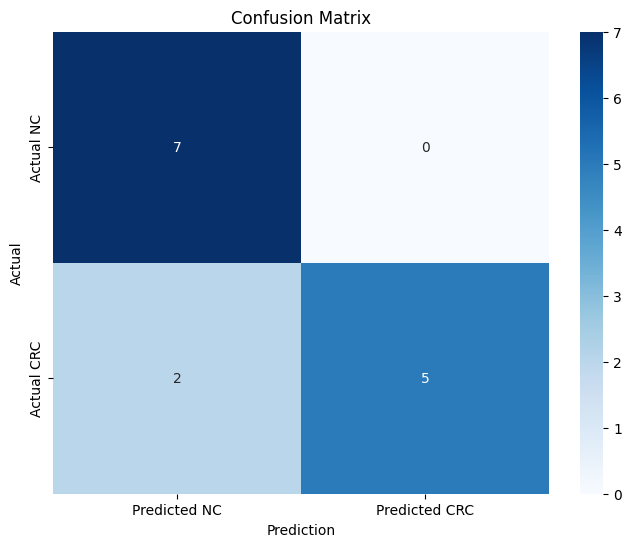

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Place the model in evaluation mode
model.eval()

y_true = []
y_pred_probs = []

# We don't need to track gradients for evaluation
with torch.no_grad():
    for inputs, labels in test_loader:
        # Move data to the GPU
        inputs = inputs.to(device)
        
        # Get model outputs (logits)
        outputs = model(inputs)
        
        # Convert logits to probabilities using sigmoid
        probs = torch.sigmoid(outputs)
        
        # Store probabilities and true labels
        # Move to CPU and convert to numpy for sklearn
        y_pred_probs.extend(probs.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred_probs = np.array(y_pred_probs)

# Convert probabilities to binary predictions (0 or 1) based on a 0.5 threshold
y_pred_binary = (y_pred_probs > 0.5).astype(int)

# --- Calculate Metrics ---
accuracy = accuracy_score(y_true, y_pred_binary)
precision = precision_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)
f1 = f1_score(y_true, y_pred_binary)
# ROC-AUC is calculated on the prediction probabilities, not the binary predictions
roc_auc = roc_auc_score(y_true, y_pred_probs)

# Added the requested title before printing the metrics
print("\n--- ANN Model Evaluation Metrics ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")


# --- Plot Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Predicted NC', 'Predicted CRC'], 
            yticklabels=['Actual NC', 'Actual CRC'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<div style="
    border-left: 4px solid #ff9800;
    background: #fff8e1;
    padding: 12px 16px;
    margin: 16px 0;
    border-radius: 4px;
">
  <h3 style="margin:0; color:#ff9800;">🧹 FT-Transformer</h3>


### 🤖 Model 2: Manual FT-Transformer (Feature Tokenizer Transformer)

Our second model is an implementation of the FT-Transformer architecture, built using standard PyTorch components. This model aims to capture complex interactions between features using the self-attention mechanism, inspired by its success in Natural Language Processing.

**Core Concepts & Architecture:**
1.  **Feature Embedding:**
    * The entire set of numerical features (`n_features`, e.g., 927) for a sample is first projected into a higher-dimensional space (`d_model`, e.g., 192) using a single `nn.Linear` layer. This embedded representation is then treated as a single "feature token" for the sequence.
    * `x = self.feature_embedder(x_cont).unsqueeze(1)` - This line projects all 927 features into a `d_model` dimension, and then `unsqueeze(1)` makes it a sequence of length 1 (i.e., `[batch_size, 1, d_model]`).

2.  **CLS (Classification) Token:**
    * A special learnable token (`self.cls_token`, shape `[1, 1, d_model]`) is prepended to the embedded feature token.
    * `x = torch.cat([cls_tokens, x], dim=1)` - This results in a sequence of length 2 (CLS token + embedded features token) for each sample (i.e., `[batch_size, 2, d_model]`).
    * The idea is that the Transformer will process this sequence, and the final state of the CLS token will aggregate information from the feature token to represent the whole sample for classification.

3.  **Transformer Encoder Blocks:**
    * The sequence (CLS token + embedded features) is passed through a stack of `n_blocks` (e.g., 3) standard `nn.TransformerEncoderLayer` modules.
    * Each encoder layer contains:
        * A Multi-Head Self-Attention mechanism (`n_heads`, e.g., 8): Allows the CLS token and the feature token to interact and weigh each other's importance.
        * A Feed-Forward Network (`dim_feedforward`, e.g., `d_model * 4`).
        * Layer Normalization and Dropout are also applied for stability and regularization.
    * `x = self.transformer_encoder(x)`

4.  **Classification Head:**
    * After passing through all Transformer blocks, the output corresponding to the `[CLS]` token (the first token in our sequence) is extracted.
    * `cls_token_output = x[:, 0, :]`
    * This CLS token representation is then passed through a final `nn.Linear` layer (with ReLU and LayerNorm) to produce the single logit for binary classification.
    * `out = self.head(cls_token_output)`

**Training Parameters:**
* **Loss Function:** `torch.nn.BCEWithLogitsLoss`.
* **Optimizer:** `torch.optim.AdamW` (Adam with weight decay) with a learning rate of `0.0001` and `weight_decay=1e-5`.
* **Epochs:** Trained for `100` epochs.
* **Batch Size:** `16`.

**Model Complexity:**
The Manual FT-Transformer model has a total of **1,513,537** trainable parameters. The main components include the feature embedding layer, the CLS token, the Transformer encoder blocks (each with multi-head self-attention and feed-forward networks), and the final classification head. The `print(model)` output shows the detailed structure.

In [18]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

# We assume X_numpy and y_numpy exist from our very first PyTorch step.
# If not, please re-run the cell that created them.

# --- 1. Define the Manual FT-Transformer Model ---
# We build this from basic PyTorch blocks.
class ManualFTTransformer(nn.Module):
    def __init__(self, n_features, d_model, n_heads, n_blocks, d_out):
        super().__init__()
        # Embedding layer for the continuous features
        self.feature_embedder = nn.Linear(n_features, d_model)
        
        # CLS token (a learnable parameter)
        self.cls_token = nn.Parameter(torch.randn(1, 1, d_model))
        
        # Standard PyTorch Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            batch_first=True, # Important!
            dim_feedforward=d_model * 4,
            dropout=0.1
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_blocks)
        
        # The final classification head
        self.head = nn.Sequential(
            nn.LayerNorm(d_model),
            nn.ReLU(),
            nn.Linear(d_model, d_out)
        )

    def forward(self, x_cont):
        # x_cont shape: [batch_size, n_features]
        
        # 1. Embed the features
        # We need to treat the embedded features as a sequence of 1 token
        x = self.feature_embedder(x_cont).unsqueeze(1) # Shape: [batch_size, 1, d_model]

        # 2. Prepend the CLS token
        b, _, _ = x.shape
        cls_tokens = self.cls_token.repeat(b, 1, 1) # Shape: [batch_size, 1, d_model]
        x = torch.cat([cls_tokens, x], dim=1) # Shape: [batch_size, 2, d_model]

        # 3. Pass through the Transformer Encoder
        x = self.transformer_encoder(x)

        # 4. Extract the CLS token's output and classify
        cls_token_output = x[:, 0, :] # Get the first token of every sequence
        out = self.head(cls_token_output)
        return out

# --- 2. Data Prep and DataLoader (This part we know works) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_numpy, y_numpy, test_size=0.2, random_state=42, stratify=y_numpy
)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)

# --- 3. Instantiate our Manual Model and set up for training ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ManualFTTransformer(
    n_features=X_numpy.shape[1], # e.g., 927
    d_model=192,
    n_heads=8,
    n_blocks=3,
    d_out=1
).to(device)

learning_rate = 0.0001
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
criterion = nn.BCEWithLogitsLoss()



In [19]:
total_params_transformer = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters in the Manual FT-Transformer model: {total_params_transformer:,}")

Total trainable parameters in the Manual FT-Transformer model: 1,513,537


In [20]:
# --- 4. The Manual Training Loop 
num_epochs = 100
model.train()

print("--- Starting Manual FT-Transformer Training ---")
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Manually move each batch to the GPU
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute loss
        loss = criterion(outputs, labels.unsqueeze(1))
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.5f}')

print("\n--- Training Finished Successfully ---")

--- Starting Manual FT-Transformer Training ---
Epoch [10/100], Loss: 0.03544
Epoch [20/100], Loss: 0.01593
Epoch [30/100], Loss: 0.01130
Epoch [40/100], Loss: 0.00921
Epoch [50/100], Loss: 0.00741
Epoch [60/100], Loss: 0.00587
Epoch [70/100], Loss: 0.00486
Epoch [80/100], Loss: 0.00439
Epoch [90/100], Loss: 0.00368
Epoch [100/100], Loss: 0.00346

--- Training Finished Successfully ---


--- Transformer Model Evaluation Metrics ---
Accuracy:  0.7857
Precision: 1.0000
Recall:    0.5714
F1 Score:  0.7273
ROC-AUC:   0.8163



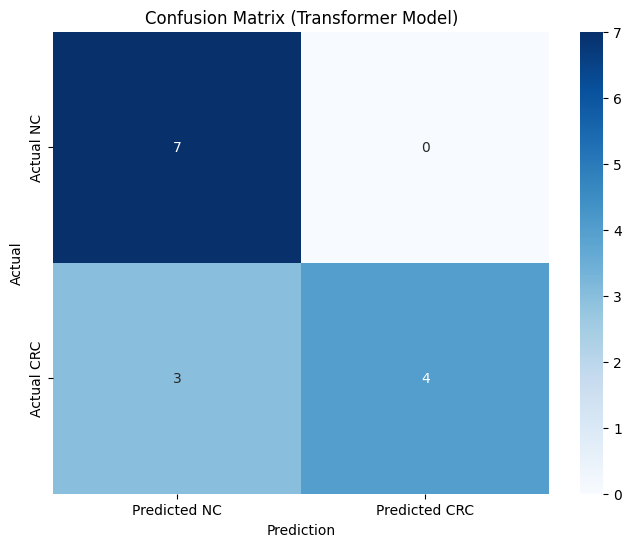

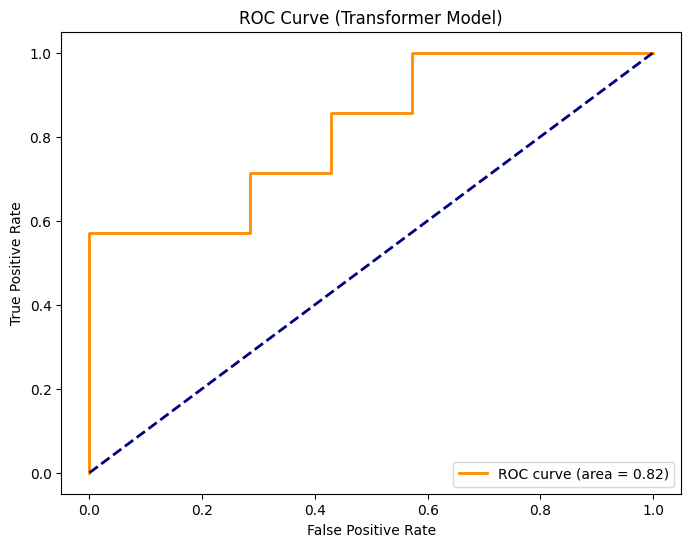

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# --- 1. Create a DataLoader for the Test Set ---
# We use the X_test and y_test NumPy arrays created during the split
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)


# --- 2. Evaluate the Model ---
model.eval() # Set the model to evaluation mode

y_true = []
y_pred_probs = []

with torch.no_grad(): # We don't need gradients for evaluation
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        
        # Forward pass
        outputs = model(inputs)
        
        # Convert logits to probabilities
        probs = torch.sigmoid(outputs)
        
        y_pred_probs.extend(probs.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred_probs = np.array(y_pred_probs).flatten() # Flatten to 1D
y_pred_binary = (y_pred_probs > 0.5).astype(int)


# --- 3. Calculate and Print Metrics ---
accuracy = accuracy_score(y_true, y_pred_binary)
precision = precision_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)
f1 = f1_score(y_true, y_pred_binary)
roc_auc = roc_auc_score(y_true, y_pred_probs)

print("--- Transformer Model Evaluation Metrics ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}\n")


# --- 4. Plot Visualizations ---
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Predicted NC', 'Predicted CRC'],
            yticklabels=['Actual NC', 'Actual CRC'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Transformer Model)')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Transformer Model)')
plt.legend(loc="lower right")
plt.show()

<div style="
    border-left: 4px solid #ff9800;
    background: #fff8e1;
    padding: 12px 16px;
    margin: 16px 0;
    border-radius: 4px;
">
  <h3 style="margin:0; color:#ff9800;">⚡ XGBOOST</h3>
  <p style="margin: 8px 0 0; color: #333;">
    This section outlines the configuration, training, and evaluation of your XGBoost model—covering data input, feature optimization, parameter tuning, and performance metrics.
  </p>
</div>


## 🚀 Model 3: XGBoost (Extreme Gradient Boosting)

Our third model is XGBoost, which stands for Extreme Gradient Boosting. XGBoost is a highly efficient and widely used machine learning algorithm based on the gradient boosting framework. It builds an ensemble of decision trees sequentially, where each new tree corrects the errors made by the previous ones. It's renowned for its performance and speed, especially on tabular datasets.

**Key Hyperparameters Used:**
* **`n_estimators`**: 100 (The number of boosting trees to build)
* **`max_depth`**: 3 (Maximum depth of an individual tree. Controls model complexity.)
* **`learning_rate` (eta)**: 0.1 (Step size shrinkage used in updates to prevent overfitting.)
* **`eval_metric`**: `'logloss'` (Evaluation metric for binary classification used internally.)
* **`random_state`**: 42 (Ensures reproducibility of the model training.)

**Training Process:**
The model was trained directly on the NumPy arrays (`X_train`, `y_train`) using the `.fit()` method.

**Model Complexity and Interpretability:**
Unlike neural networks, XGBoost models don't have "weights and biases" in the same layered sense. The complexity is determined by the number and structure of the decision trees.

The most insightful way to understand feature contributions for this XGBoost model is through the **SHAP analysis** performed later in this notebook. The SHAP values provide a robust measure of each feature's impact on the model's predictions. The SHAP summary plots and the ranked list of features give a clear picture of which metabolites are driving the classification.

--- Starting XGBoost Training ---
--- Training Finished Successfully ---

--- XGBoost Model Evaluation Metrics ---
Accuracy:  0.7857
Precision: 0.7500
Recall:    0.8571
F1 Score:  0.8000
ROC-AUC:   0.8980



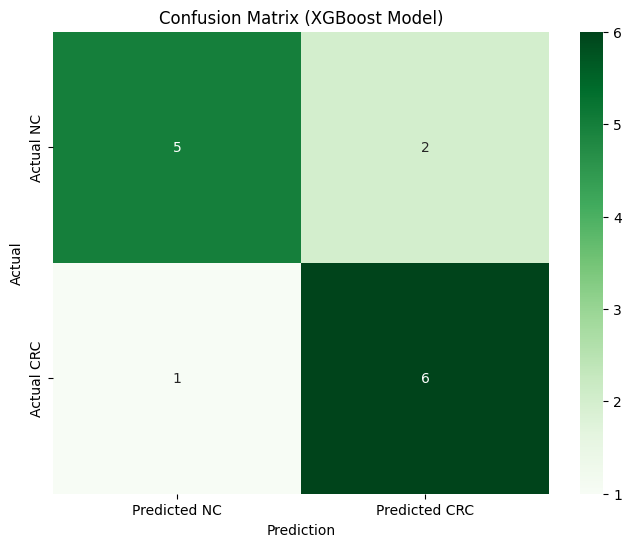

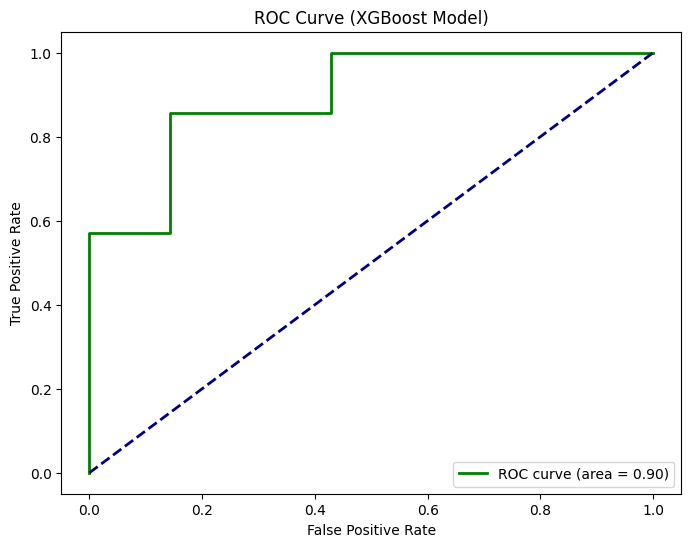

In [22]:
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np

# We assume X_train, y_train, X_test, and y_test are the NumPy arrays
# from your previous train_test_split.

# --- 1. Define and Train the XGBoost Model (Corrected) ---
# We instantiate the XGBClassifier with the unused parameter removed.
xgb_model = xgb.XGBClassifier(
    n_estimators=100,         # Number of trees to build
    max_depth=3,              # Maximum depth of a tree
    learning_rate=0.1,        # Step size shrinkage
    eval_metric='logloss',    # Evaluation metric for binary classification
    random_state=42           # For reproducibility
)

# Training is a single, simple command
print("--- Starting XGBoost Training ---")
xgb_model.fit(X_train, y_train)
print("--- Training Finished Successfully ---")


# --- 2. Evaluate the Model ---
# Get binary predictions (0 or 1)
y_pred_binary = xgb_model.predict(X_test)

# Get prediction probabilities for the positive class (for ROC-AUC)
y_pred_probs = xgb_model.predict_proba(X_test)[:, 1]


# --- 3. Calculate and Print Metrics ---
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_probs)

print("\n--- XGBoost Model Evaluation Metrics ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}\n")


# --- 4. Plot Visualizations ---
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens',
            xticklabels=['Predicted NC', 'Predicted CRC'],
            yticklabels=['Actual NC', 'Actual CRC'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost Model)')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost Model)')
plt.legend(loc="lower right")
plt.show()

## 📊 Final Model Performance Comparison

After training and evaluating our three different models (Artificial Neural Network, FT-Transformer, and XGBoost), we can now compare their performance on the unseen test data.

### Summary of Evaluation Metrics

Here's a table summarizing the key metrics for each model:

| Metric        | ANN      | FT-Transformer | XGBoost  |
| :------------ | :------- | :------------- | :------- |
| Accuracy      | 0.8571   | 0.7857         | 0.7857   |
| Precision     | 1.0000   | 1.0000         | 0.7500   |
| Recall        | 0.7143   | 0.5714         | **0.8571** |
| F1 Score      | **0.8333** | 0.7273         | 0.8000   |
| ROC-AUC       | **0.9184** | 0.8163         | 0.8980   |


### Detailed Interpretation

* **Accuracy:**
    * The ANN model achieved the highest accuracy at 85.71%.
    * Both the FT-Transformer and XGBoost models achieved an accuracy of 78.57%.
    * While accuracy gives a general sense of correctness, it doesn't tell the whole story, especially when considering the costs of different types of errors in a medical context.

* **Precision:**
    * Both the **ANN and FT-Transformer achieved perfect Precision (1.0000)**. This means that every sample they predicted as 'CRC' was indeed a 'CRC' case (zero false positives). This is excellent for avoiding unnecessary follow-up procedures for healthy patients.
    * XGBoost had a lower precision of 0.7500, meaning when it predicted 'CRC', it was correct 75% of the time.

* **Recall (Sensitivity):**
    * This is often a critical metric in medical diagnostics, as it measures the model's ability to find all true positive cases (i.e., correctly identify patients who actually have CRC).
    * **XGBoost is the clear winner here with a Recall of 0.8571.** This means it successfully identified approximately 86% of the actual CRC cases in the test set.
    * The ANN had a Recall of 0.7143.
    * The FT-Transformer had the lowest Recall at 0.5714, indicating it missed a larger proportion of true CRC cases.

* **F1 Score:**
    * The F1 Score provides a balance between Precision and Recall.
    * The **ANN achieved the highest F1 Score (0.8333)**, indicating a very good balance, largely driven by its perfect precision.
    * XGBoost followed closely with an F1 Score of 0.8000, reflecting its excellent recall even with slightly lower precision.
    * The FT-Transformer had the lowest F1 Score (0.7273).

* **ROC-AUC Score:**
    * This metric measures the model's overall ability to discriminate between the 'CRC' and 'NC' classes.
    * The **ANN had the highest ROC-AUC score (0.9184)**, suggesting it has the best overall separability between the two classes.
    * XGBoost also performed very well with an ROC-AUC of 0.8980.
    * The FT-Transformer had a lower ROC-AUC of 0.8163.

### Discussion and Conclusion

This comparison reveals some interesting trade-offs:

* The **FT-Transformer**, despite its complexity, did not perform as well as the simpler models on this dataset, especially in terms of recall and F1-score. Its perfect precision suggests it might be too conservative, potentially due to overfitting on the small dataset (only 70 samples total, so ~56 for training).

* The **ANN** shows excellent overall performance with the highest Accuracy, F1-score, and ROC-AUC, and perfect Precision. Its Recall (0.7143) is respectable.

* The **XGBoost** model stands out for its **highest Recall (0.8571)**. While its precision is lower than the neural networks, its ability to correctly identify more of the true positive cases (CRC) is extremely valuable in a medical diagnostic context where minimizing false negatives is often paramount. Its F1 score is also very strong.

**Recommendation:**

* If the primary goal is overall predictive performance with a good balance and high precision, the **ANN seems to be the top performer** based on this set of metrics (especially its high F1 and ROC-AUC with perfect precision).
* However, if the absolute priority is to **minimize missed cancer cases (maximize Recall)**, then the **XGBoost model is the best choice**, as it correctly identified the highest proportion of actual CRC samples, even if it means a few more false positives.

The "best" model often depends on the specific costs associated with different types of errors in the real-world application. For cancer screening, a model with higher recall (like XGBoost here) is often preferred, even if it requires follow-up tests to rule out false positives.

This project has successfully demonstrated how different modeling approaches can yield varying strengths. The SHAP analysis for XGBoost further provides interpretability, linking its predictive power back to specific metabolites, which is a valuable outcome.

<div style="
    border-left: 4px solid #ff9800;
    background: #fff8e1;
    padding: 12px 16px;
    margin: 16px 0;
    border-radius: 4px;
">
  <h3 style="margin:0; color:#ff9800;">🔍 SHAP Analysis</h3>
  <p style="margin: 8px 0 0; color: #333;">
    This section demonstrates how to leverage SHAP (SHapley Additive exPlanations) to interpret your model’s predictions—computing feature contributions, generating global summary plots, and drilling into local explanations for individual samples.
  </p>
</div>


## 🔬 Comparing Predictive Biomarkers with Study's Statistical Findings

This section brings together the insights from our machine learning approach with the traditional statistical filtering methodology outlined in the provided study notes. The goal is to achieve a more robust and comprehensive understanding of the key differentiating metabolites.

**Our approach involves:**

1.  **Identifying the "ML Set":** These are the top 24 most influential metabolites derived from our best-performing predictive model (XGBoost) using SHAP (SHapley Additive exPlanations) values. These features are critical for the model's ability to accurately classify samples.
2.  **Identifying the "Statistical Set":** These are the metabolites deemed significant according to the original study's specific criteria:
    * OPLS-DA VIP score ≥ 1.0
    * Absolute Log₂ Fold Change (|Log₂ FC|) ≥ 1.0
    * Statistical significance (p-value) < 0.05
    We will derive this set by applying these filters to the provided `NC_vs_CRC_filter.xlsx` file, using the 'Compounds' column for metabolite names.
3.  **Comparing the Sets:** We will then find:
    * **Intersection:** Metabolites highlighted as important by *both* methodologies. These represent high-confidence biomarkers.
    * **Unique to Machine Learning (SHAP):** Metabolites important for prediction but not meeting all strict statistical cutoffs.
    * **Unique to Study's Statistical Filters:** Metabolites statistically significant individually but perhaps less crucial for the combined predictive power of the ML model.

This comparison will help validate findings and potentially uncover novel insights.

In [23]:
import pandas as pd
filter_df = pd.read_excel(r'Original Study Data\NC_vs_CRC_filter.xlsx')

In [26]:
import pandas as pd

# We assume 'filter_df' is the pandas DataFrame you loaded from 'NC_vs_CRC_filter.xlsx'.

# 1. Apply the study's filters to get the significant metabolites
# Ensure your filter_df has columns named 'VIP', 'Log2FC', 'p_value', and 'Compounds'.
try:
    mask_study_criteria = (
        (filter_df['VIP'] >= 1.0) &
        (filter_df['Log2FC'].abs() >= 1.0) & # Using .abs() for absolute value
        (filter_df['p_value'] < 0.05)
    )
    
    # Select the rows (metabolites) that meet all criteria
    study_significant_metabolites_df = filter_df[mask_study_criteria]
    
    # MODIFIED: Get the metabolite names from the 'Compounds' column
    if 'Compounds' in study_significant_metabolites_df.columns:
        study_top_metabolites_list = study_significant_metabolites_df['Compounds'].tolist()
        
        print(f"Found {len(study_top_metabolites_list)} metabolites meeting the study's criteria (using 'Compounds' column).")
        
        if study_top_metabolites_list:
            print("\n--- Metabolites Matching Study's Criteria (from 'Compounds' column) ---")
            for i, metabolite in enumerate(study_top_metabolites_list, 1):
                print(f"{i}. {metabolite}")
        else:
            print("No metabolites found after filtering (or 'Compounds' column was empty).")
            
    else:
        print("ERROR: The column 'Compounds' was not found in your filter_df after applying filters.")
        print("Please ensure the 'Compounds' column exists and contains the metabolite names.")
        study_top_metabolites_list = [] # Initialize to avoid errors later if needed

except KeyError as e:
    print(f"ERROR: A required column for filtering was not found in your filter_df: {e}")
    print("Please ensure your 'NC_vs_CRC_filter.xlsx' file contains columns named 'VIP', 'Log2FC', and 'p_value'.")
    study_top_metabolites_list = [] # Initialize to avoid errors later if needed

Found 24 metabolites meeting the study's criteria (using 'Compounds' column).

--- Metabolites Matching Study's Criteria (from 'Compounds' column) ---
1. D-Erythronolactone
2. 1,6-anhydro-β-D-glucose
3. Deoxyribose 5-phosphate
4. 2-Aminobenzenesulfonic acid
5. Quinoline-4-carboxylic acid
6. cyclo(glu-glu)
7. P-sulfanilic acid
8. Methylcysteine
9. Asp-Arg
10. LPI(16:2/0:0)
11. 5'-Deoxy-5'-(Methylthio) Adenosine
12. Thiamine Monophosphate
13. Cytarabine
14. LPC(18:3/0:0)
15. LPC(16:1/0:0)
16. Carnitine C7:DC
17. 17a-Estradiol
18. 17β-Estradiol
19. LPC(13:0/0:0)
20. Quinoline-2-carboxylic acid
21. LPE(17:1/0:0)
22. N(Alpha)-Acetyl-Epsilon-(2-Propenal)Lysine
23. Cyclo(Phe-Glu)
24. 2'-Deoxyinosine-5'-monophosphate


--- Calculating SHAP values for the XGBoost model ---
✅ SHAP values calculated.

--- Generating SHAP Swarm Plot (Top 24 Features) ---
✅ Plot saved successfully to: C:\Users\vince\Coursework\Masters Project\Papers\chapters\figures\SHAP_swarm_plot.pdf


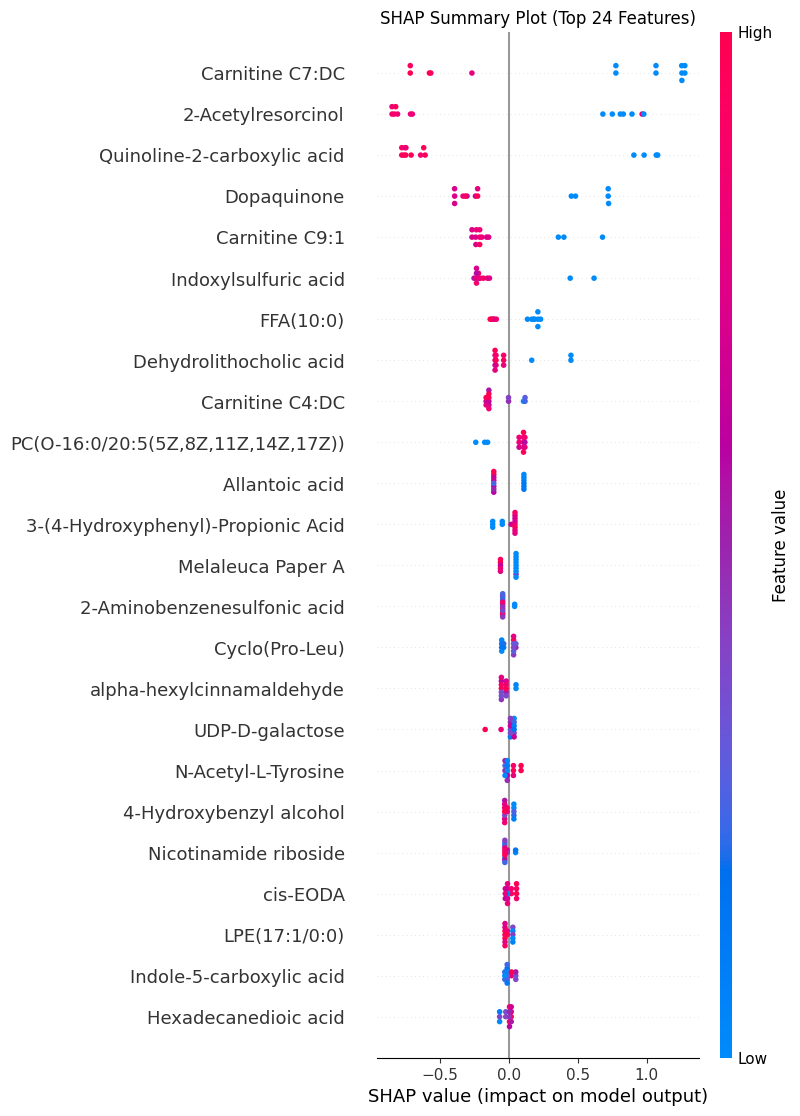

In [46]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import os # Import the os module to handle file paths
import warnings

# --- Suppress potential FutureWarning from SHAP's plotting functions ---
warnings.filterwarnings('ignore', category=FutureWarning)

# We assume 'xgb_model', 'X_test', and 'feature_cols' are already defined from previous cells.

# --- Calculate SHAP values for the XGBoost model ---
print("--- Calculating SHAP values for the XGBoost model ---")
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
print("✅ SHAP values calculated.")

# --- Define the output directory ---
output_dir = r"figures"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

# --- Now, we generate the plot for the top 24 features ---
print("\n--- Generating SHAP Swarm Plot (Top 24 Features) ---")

# --- Step 1: Use the 'feature_cols' variable to create a labeled DataFrame ---
X_test_df = pd.DataFrame(X_test, columns=feature_cols)

# --- Step 2: Generate the Swarm Plot ---
# The `show=False` argument allows us to add a custom title and save before displaying.
shap.summary_plot(
    shap_values,
    X_test_df,
    plot_type="dot",  # "dot" is the official name for the swarm/beeswarm plot
    max_display=24,   # This now limits the plot to the top 24 features.
    show=False
)

# --- Step 3: Save the plot to the specified path ---
# Add a title to the figure
plt.title("SHAP Summary Plot (Top 24 Features)") 

# Define the full path for the output file
plot_path = os.path.join(output_dir, "SHAP_swarm_plot.pdf")

# Save the figure. Using bbox_inches='tight' helps prevent labels from being cut off.
plt.savefig(plot_path, format='pdf', dpi=300, bbox_inches='tight')

print(f"✅ Plot saved successfully to: {plot_path}")

# Finally, display the plot in the notebook
plt.show()


--- Generating SHAP Feature Importance Plot ---


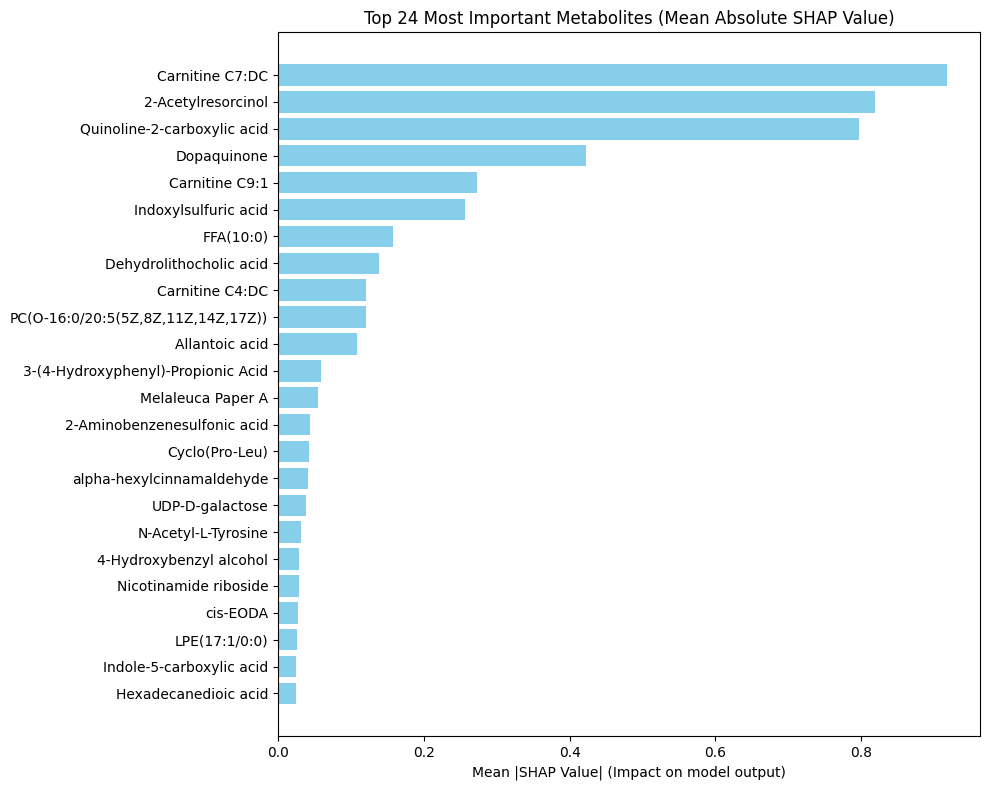

✅ SHAP plot saved to: C:\Users\vince\Coursework\Masters Project\Papers\chapters\figures\SHAP_importance_barchart.pdf


In [39]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import shap
import pandas as pd
import os

# --- Create a dedicated figures directory if it doesn't exist ---
output_dir = r"figures"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# ======================================================================
# --- 1. Generate and Save SHAP Feature Importance Plot ---
# ======================================================================
print("--- Generating SHAP Feature Importance Plot ---")

# We use the top_features_df which has the human-readable metabolite names
# We'll plot the top 20 for clarity
top_24_for_plot = top_features_df.head(24).sort_values(by='SHAP Importance', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(top_24_for_plot['Metabolite Name'], top_24_for_plot['SHAP Importance'], color='skyblue')
plt.title('Top 24 Most Important Metabolites (Mean Absolute SHAP Value)')
plt.xlabel('Mean |SHAP Value| (Impact on model output)')
plt.tight_layout() # Adjust layout to make sure labels are not cut off

# Save the plot as a high-quality PDF
shap_plot_path = os.path.join(output_dir, "SHAP_importance_barchart.pdf")
plt.savefig(shap_plot_path, format='pdf', dpi=300)
plt.show() # Display the plot in the notebook
print(f"✅ SHAP plot saved to: {shap_plot_path}")

In [40]:
# We assume 'top_features_df' is the pandas DataFrame from your last SHAP step.

# --- 1. Create a readable DataFrame of the top 24 features ---
# Get the feature index and map it to the metabolite name
top_24_features = top_features_df.head(24)

# --- 2. Print the list in a clean format ---
print("--- Top 24 Predictive Metabolites Identified by XGBoost and SHAP ---")
# Use to_string() to ensure the full metabolite names are displayed without being truncated
print(top_24_features.to_string())

--- Top 24 Predictive Metabolites Identified by XGBoost and SHAP ---
                        Metabolite Name  SHAP Importance
335                     Carnitine C7:DC         0.916967
101                  2-Acetylresorcinol         0.819008
812         Quinoline-2-carboxylic acid         0.796789
416                         Dopaquinone         0.422750
339                      Carnitine C9:1         0.272324
521                Indoxylsulfuric acid         0.256557
424                           FFA(10:0)         0.158057
403             Dehydrolithocholic acid         0.139080
329                     Carnitine C4:DC         0.121352
755  PC(O-16:0/20:5(5Z,8Z,11Z,14Z,17Z))         0.120053
253                      Allantoic acid         0.109019
145  3-(4-Hydroxyphenyl)-Propionic Acid         0.058955
668                   Melaleuca Paper A         0.055564
105         2-Aminobenzenesulfonic acid         0.043422
362                      Cyclo(Pro-Leu)         0.042370
908           alpha

--- Comparison of Feature Importance Methods ---
\nMetabolites in our Top 24 SHAP list: 24
Metabolites in Study's Statistical Filter list: 24
\nMetabolites found in BOTH lists (Intersection): 4


--- ✅ INTERSECTION: Highest-Confidence Biomarkers ---
1. 2-Aminobenzenesulfonic acid
2. Carnitine C7:DC
3. LPE(17:1/0:0)
4. Quinoline-2-carboxylic acid


--- 🧠 UNIQUE TO MACHINE LEARNING (SHAP Top 24 only) ---
1. 2-Acetylresorcinol
2. 3-(4-Hydroxyphenyl)-Propionic Acid
3. 4-Hydroxybenzyl alcohol
4. Allantoic acid
5. Carnitine C4:DC
6. Carnitine C9:1
7. Cyclo(Pro-Leu)
8. Dehydrolithocholic acid
9. Dopaquinone
10. FFA(10:0)
11. Hexadecanedioic acid
12. Indole-5-carboxylic acid
13. Indoxylsulfuric acid
14. Melaleuca Paper A
15. N-Acetyl-L-Tyrosine
16. Nicotinamide riboside
17. PC(O-16:0/20:5(5Z,8Z,11Z,14Z,17Z))
18. UDP-D-galactose
19. alpha-hexylcinnamaldehyde
20. cis-EODA


--- 🔬 UNIQUE TO STUDY'S STATISTICAL FILTERS ---
1. 1,6-anhydro-β-D-glucose
2. 17a-Estradiol
3. 17β-Estradiol
4. 2'-Deoxyino

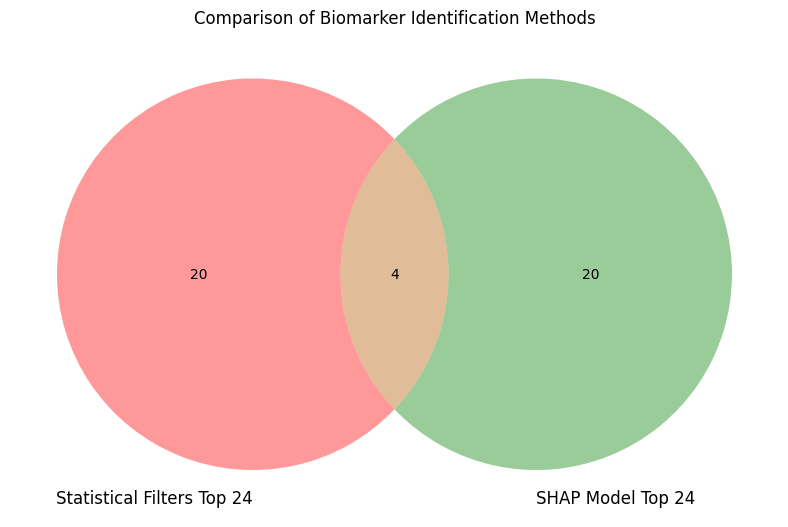

✅ Venn diagram saved to: C:\Users\vince\Coursework\Masters Project\Papers\chapters\figures\biomarker_comparison_venn.pdf


In [44]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import os

# We assume the following variables exist from previous cells:
# - top_24_shap_features_set: The set of 24 metabolite names from SHAP
# - study_top_metabolites_list: The list of 24 metabolite names from the study's filters

# --- 1. Convert the study's list to a set for comparison ---
study_statistical_hits_set = set(study_top_metabolites_list)

# --- 2. Compare the Sets ---
intersection = top_24_shap_features_set.intersection(study_statistical_hits_set)
unique_to_shap = top_24_shap_features_set.difference(study_statistical_hits_set)
unique_to_study_stats = study_statistical_hits_set.difference(top_24_shap_features_set)

# --- 3. Print the Comparison Results ---
print("--- Comparison of Feature Importance Methods ---")
print(f"\\nMetabolites in our Top 24 SHAP list: {len(top_24_shap_features_set)}")
print(f"Metabolites in Study's Statistical Filter list: {len(study_statistical_hits_set)}")
print(f"\\nMetabolites found in BOTH lists (Intersection): {len(intersection)}")

print("\n\n--- ✅ INTERSECTION: Highest-Confidence Biomarkers ---")
if intersection:
    for i, metabolite in enumerate(sorted(list(intersection)), 1):
        print(f"{i}. {metabolite}")
else:
    print("No common metabolites found between the two methods.")

print("\n\n--- 🧠 UNIQUE TO MACHINE LEARNING (SHAP Top 24 only) ---")
if unique_to_shap:
    for i, metabolite in enumerate(sorted(list(unique_to_shap)), 1):
        print(f"{i}. {metabolite}")
else:
    print("No metabolites were unique to the SHAP method.")

print("\n\n--- 🔬 UNIQUE TO STUDY'S STATISTICAL FILTERS ---")
if unique_to_study_stats:
    for i, metabolite in enumerate(sorted(list(unique_to_study_stats)), 1):
        print(f"{i}. {metabolite}")
else:
    print("No metabolites were unique to the study's statistical filtering method.")

# --- 4. Generate, Display, and Save Venn Diagram ---
print("\n\n--- Generating Venn Diagram for Biomarker Comparison ---")

output_dir = r"figures"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

plt.figure(figsize=(8, 8))

# The venn2 function can take sets directly
v = venn2(
    [study_statistical_hits_set, top_24_shap_features_set],
    set_labels=('Statistical Filters Top 24', 'SHAP Model Top 24')
)

plt.title("Comparison of Biomarker Identification Methods")
plt.tight_layout()

# Save the plot
venn_diagram_path = os.path.join(output_dir, "biomarker_comparison_venn.pdf")
plt.savefig(venn_diagram_path, format='pdf', dpi=300)
plt.show()
print(f"✅ Venn diagram saved to: {venn_diagram_path}")

In [ ]:
spark.stop()


<div style="border-left: 6px solid #28a745; background-color: #e9f5ec; padding: 20px 25px; margin: 25px 0; border-radius: 8px; box-shadow: 0 2px 5px rgba(0,0,0,0.1);">
  <h2 style="margin-top: 0; margin-bottom: 15px; color: #1e7e34; border-bottom: 2px solid #1e7e34; padding-bottom: 8px;"> Conclusion</h2>
  <p style="margin-bottom: 15px; color: #333;">
    This analysis successfully demonstrates the power of an integrated machine learning and eXplainable AI framework for identifying clinically relevant biomarkers in colorectal cancer. The <strong>XGBoost model</strong> was selected as the optimal classifier due to its superior <strong>recall score of 0.8571</strong>, correctly identifying <strong>6 out of 7 CRC cases</strong> in the unseen test set. This performance underscores its potential utility in a diagnostic setting where minimizing false negatives is paramount.
  </p>
  <p style="margin-bottom: 0; color: #333;">
    Crucially, the interpretation of this model using <strong>SHAP</strong> led to the identification of a panel of <strong>20 distinct biomarker candidates</strong> that were not detected by conventional statistical filtering. This finding highlights the ability of data-driven approaches to uncover complex, multivariate signatures that are invisible to traditional univariate methods. The work provides a robust, reproducible workflow for leveraging metabolomics data to generate new, biologically plausible hypotheses for cancer research.
  </p>
</div>
